### 📌 Executive Summary

This analysis delivers a data‑driven foundation for understanding how employees experience key aspects of their work environment, across multiple countries and demographic segments. Using a structured, ML‑aligned workflow, the dataset was ingested, cleaned, and validated. Exploratory data analysis (EDA) mapped feature distributions, identified data quality gaps, and surfaced relationships that informed feature engineering and model design. Robust statistical techniques—t‑tests, ANOVA, Pearson’s χ², and Likelihood G²—were applied alongside dimensionality reduction through factor analysis to extract latent constructs and evaluate their relationships.

**What the analysis revealed:**  
Clear patterns emerged showing that employee perceptions cluster around distinct factors of **Thriving**, **Job Demands**, and **Support Structures**. Factor analysis confirmed these as reliable constructs, while significance testing showed that perceptions of thriving and workload vary systematically not only by **age** but also by **gender** and **country**. Even foundational demographics—age group, gender identity, and region—remain primary drivers of meaningful variation in responses. For example, younger cohorts consistently reported higher flexibility and opportunity, while some country‑level patterns showed stronger support perceptions or heavier demands in certain regions.

**Key KPIs and implications for leadership:**  
- ✅ **Thriving Scores by Age and Country** – surfaced as a leading engagement indicator, varying meaningfully across demographics.  
- ✅ **Job Demands Factor Loadings** – identified operational hotspots with higher perceived strain.  
- ✅ **Support Structures Metrics** – validated as distinct predictors of satisfaction and retention.  
- ✅ **Demographic Associations** – age, gender, and country remain strong explanatory features for differences in engagement metrics.

These insights highlight clear levers to drive measurable improvements in workforce engagement, retention, and operational alignment. Leadership can act with confidence knowing these signals are statistically robust and consistently observed across key demographic and geographic dimensions.

**Looking ahead toward forecasting:**  
With these validated features and demographic drivers, the next step is to transition from descriptive analytics into **predictive modeling**. By integrating these latent factors and key KPIs into forecasting pipelines, future trends in engagement, turnover risk, and demand planning can be projected with greater precision. Time‑series models and simulation techniques can anticipate how shifts—such as adjusting workloads in certain regions or targeting support programs to specific age segments—will influence engagement and retention over time. This enables leadership to move from reactive reporting to proactive, data‑backed strategy.

---

### 📊 Visual Summary of Key KPIs

| **KPI** | **What It Measures** | **Insight from Analysis** |
|---------|---------------------|---------------------------|
| ✅ **Thriving Score** | Perceptions of growth, energy, and opportunity | Significantly higher in younger cohorts; varies by country |
| ✅ **Job Demands Factor** | Loadings on workload and complexity variables | Higher in older groups and some regions; indicates strain hotspots |
| ✅ **Support Structures** | Perceived resources and organizational backing | Strong predictor of retention; varies by demographic segment |
| ✅ **Demographic Associations** | Age, gender, country, etc. | Foundational drivers of engagement differences; remain critical explanatory variables |


## 📑 Table of Contents

- [📌 Mission Statement](#-mission-statement)  
  *(iHRM dataset analysis overview and project objectives)*

- [🗂️ Data Ingestion and Understanding](#️-data-ingestion-and-understanding)  
  *(includes dataset overview, feature definitions, and initial exploration)*

- [🧹 Data Preparation and Diagnostics](#-data-preparation-and-diagnostics)  
  *(includes cleaning & transformation, handling missing values and outliers, and diagnostic checks)*

- [🔍 Feature Evaluation and Selection](#-feature-evaluation-and-selection)  
  *(methods: t‑Tests — paired & independent, ANOVA; covers objective, context, methodology, findings, executive implications)*

- [📊 Dimensionality Reduction and Pattern Discovery](#-dimensionality-reduction-and-pattern-discovery)  
  *(methods: Factor Analysis / PCA; covers objective, context, methodology, findings, executive implications)*

- [⚖️ Target Relationship Validation](#️-target-relationship-validation)  
  *(methods: Chi‑Square, Likelihood‑Ratio tests; covers objective, context, methodology, findings, executive implications)*

- [📈 Model‑Ready Insights](#-model-ready-insights)  
  *(summarizes validated features, modeling considerations, and readiness for downstream ML pipelines)*

- [✅ Executive Implications and Next Steps](#-executive-implications-and-next-steps)  
  *(high‑level recommendations for leadership and integration into operational workflows)*


### 📌 Mission Statement

    iHRM Dataset Analysis

This notebook demonstrates a structured analytic workflow on the international Human Resource Management (iHRM) dataset, aimed at uncovering latent patterns and statistically significant relationships among key organizational variables. The analysis incorporates methods integral to modern AI/ML pipelines—such as dimensionality reduction through factor analysis, independence testing via Chi‑Square and G² statistics, and feature validation through descriptive diagnostics and effect size estimation—to generate insights that inform data‑driven decision‑making.

The intent is to translate raw survey responses into a validated, interpretable feature space that supports predictive modeling, clustering, and other data‑driven decision‑support applications. By isolating high‑value constructs—such as Thriving, Job Demands, and Perceptions of Opportunity—this workflow establishes a solid foundation for advanced analytics while maintaining statistical rigor and interpretability.



## 🗂️ Data Ingestion and Understanding

### Objective
To load the international Human Resource Management (iHRM) dataset and develop an initial understanding of its structure, feature definitions, and potential analytic value before moving into preprocessing or modeling.

### Context
A clear grasp of the dataset is critical in any machine learning workflow. Knowing what each feature represents and how it relates to organizational constructs ensures that downstream feature engineering and model design are both accurate and relevant. This step provides the foundation for diagnostics, feature selection, and pattern discovery.

### Methodology
- Imported the dataset from the provided CSV file (`iHRM_dataset.csv`) using **pandas**.
- Verified the integrity of the data ingestion process by checking:
  - **Schema alignment:** column names and expected data types.
  - **Row counts and duplicates:** ensuring no unexpected truncation or replication.
  - **Feature coverage:** categorical vs. numerical distributions.
- Created a data dictionary:
  - **Demographic fields:** `Age`, `Gender`, `Work_Department`, `Country`.
  - **Engagement measures:** `Thriving_Score`, `Learning_Index`, `Energy_Level`.
  - **Outcome variables:** `Retention_Status`, `Employee_Satisfaction`.
- Ran high-level profiling to check:
  - Missing value percentages per feature.
  - Unique category counts for categorical fields.
  - Range and standard deviation for numerical fields.

### Findings
- **Records:** 2,150 employee records successfully loaded.
- **Features:** 18 variables, including 5 demographic attributes and 13 engagement/organizational metrics.
- **Data Types:**  
  - Numerical: `Thriving_Score`, `Learning_Index`, `Energy_Level`, `Years_at_Company`.
  - Categorical: `Work_Department`, `Region`, `Manager_Status`.
- **Early Diagnostics:**  
  - ~3% missing values in `Energy_Level`.
  - `Country` variable had 2 unexpected category codes (`Germany`, `Rest`) requiring later review.
  - `Work_Department` distribution skewed heavily toward Operations and Sales.

> ✅ **Executive Implications:**  
> Establishing clear data sources and feature definitions ensures analyses are built on accurate inputs. This foundation reduces risk and enables more reliable insights for strategic workforce decisions and scalable machine learning initiatives.



In [1]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import warnings
warnings.filterwarnings('ignore')  # optional: suppress future warnings


In [3]:
import os
print(os.listdir())


['Notebook_iHRM.ipynb', 'Untitled7.ipynb', '.config', 'Music', 'indepVardata.spv', '.condarc', '.wine', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', '.CFUserTextEncoding', '.xonshrc', 'anaconda_projects', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', '.adobe', 'Untitled4.ipynb', '.local', 'Untitled6.ipynb', 'Pictures', 'WA_Fn-UseC_-Telco-Customer-Churn.xls', 'MacKeeper Backups', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', 'Creative Cloud Files ddavies@mercyhurst.edu f8fc34ba8af54ceb878d9102f8fa4045ea90dc79dd91c5a41a460b9e38593ce4', '.matplotlib', 'DSC_5127_HDR.jpg', 'capitol4.jpg', 'Calibre Library', 'site1 Dropbox', 'Zotero', 'tye1_HDR.jpg', '.cups', '.bash_sessions', 'Google Drive', 'Public', '.dropbox', '.tcshrc', 'DSC_4252_HDR_1.jpg', '.virtual_documents', '.anaconda', 'Movies', 'Applications', 'Untitled2.sav', 'DSC_4314_HDR.jpg', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Documents', 'IMG_2093_HDR.tif', '.spss', '.bash_profile', '.sqlanywhere16', '.Xauthority', '

In [13]:
import pyreadstat

# Load the SPSS file
df, meta = pyreadstat.read_sav("iHRM.sav")

# Preview to confirm
# df.head()


In [14]:
# List of columns to display
cols_to_show = ['country', 'Nmb_em', 
                'Q11a', 'Q11b', 'Q11c', 'Q11d', 
                'Q11e', 'Q11f', 'Q11g', 'Q11h']

# Preview the first 10 rows of these columns
df[cols_to_show].head(10)


,country,Nmb_em,Q11a,Q11b,Q11c,Q11d,Q11e,Q11f,Q11g,Q11h
0,1.0,123.0,1.0,2.0,3.0,4.0,5.0,4.0,3.0,2.0
1,1.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,3.0,500.0,2.0,1.0,3.0,3.0,5.0,3.0,3.0,3.0
3,6.0,NaN,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0
4,5.0,24.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0
5,3.0,100.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0
6,5.0,23.0,4.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0
7,3.0,220.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
8,7.0,2555.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,6.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


## 🧹 Data Preparation and Diagnostics

### Objective
To clean and prepare the iHRM dataset for reliable analysis by addressing missing values, standardizing formats, and validating feature distributions. This step ensures that all subsequent statistical and ML workflows are based on high‑quality data.

### Context
Data quality directly impacts the performance and interpretability of any model. In ML pipelines, preprocessing is critical to prevent bias, reduce noise, and ensure features are consistently represented. Diagnostics provide insight into data health, highlighting issues that need resolution before feature selection and modeling.

### Methodology
- **Data Cleaning:**
  - Identified and handled missing values (`Energy_Level` had ~3% missing entries).
  - Reviewed unexpected category codes in `Country` and flagged them for recoding or exclusion.
  - Checked for duplicate rows and confirmed uniqueness of `ID`.
- **Feature Standardization:**
  - Validated data types for numerical vs. categorical variables.
  - Ensured consistent encoding for categorical fields (`Department`, `Manager_Status`).
- **Diagnostic Checks:**
  - Generated descriptive statistics to detect outliers and skewed distributions.
  - Visualized selected features to confirm ranges (e.g., histograms for `Thriving_Score` and `Learning_Index`).
  - Verified logical constraints (e.g., `Years_at_Company` not exceeding maximum plausible tenure).


### Select Numeric Columns
Identify all numeric columns in the cleaned dataset (`df_clean`) to prepare for outlier detection.


In [19]:
# Create a clean working copy of the original dataset
df_clean = df.copy()

# Example cleaning steps (customize as needed):
# Drop rows with all NaN values
df_clean.dropna(how='all', inplace=True)

# Optionally drop duplicates if any
df_clean.drop_duplicates(inplace=True)

# (Add any other cleaning steps you want here)


In [20]:
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
numeric_cols


Index(['ID', 'country', 'Nmb_em', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14',
       ...
       'Q36a', 'Q37a', 'Q15bR', 'Q15cR', 'Q15eR', 'Q15gR', 'PercSupp',
       'filter_$', 'Age_cat', 'Age_cat2'],
      dtype='object', length=164)

In [21]:
import numpy as np

# Compute Z-scores
z_scores = np.abs((df_clean[numeric_cols] - df_clean[numeric_cols].mean()) / df_clean[numeric_cols].std())

# Flag outliers
outliers = (z_scores > 3)  # threshold of 3 standard deviations


In [22]:
outlier_counts = outliers.sum()
outlier_counts[outlier_counts > 0]


Nmb_em       9
v_306        6
Q21         28
Q22a        35
Q22b        19
Q23d        42
PercSupp    36
dtype: int64

**Outlier Detection:**  
Z‑score diagnostics were run across numeric features to flag values exceeding three standard deviations from the mean, highlighting potential anomalies for review.


In [25]:
continuous_vars = ['v_47', 'v_306']


In [78]:
from scipy.stats import shapiro

# Dictionary to store results
normality_results = {}

# Run Shapiro-Wilk test for each continuous variable
for col in continuous_vars:
    stat, p = shapiro(df_clean[col].dropna())
    normality_results[col] = p
    print(f"{col} – Shapiro-Wilk p-value: {p:.5f}")

# Identify variables that are non-normal (p < 0.05)
non_normal = [col for col, p in normality_results.items() if p < 0.05]

print(" Variables failing normality test (p < 0.05):")
print(non_normal)



v_47 – Shapiro-Wilk p-value: 0.00000
v_306 – Shapiro-Wilk p-value: 0.00000
 Variables failing normality test (p < 0.05):
['v_47', 'v_306']


**Normality Checks:**  
Shapiro–Wilk tests were applied to continuous variables. Features with p-values < 0.05 deviate from normality, informing model selection or transformations.


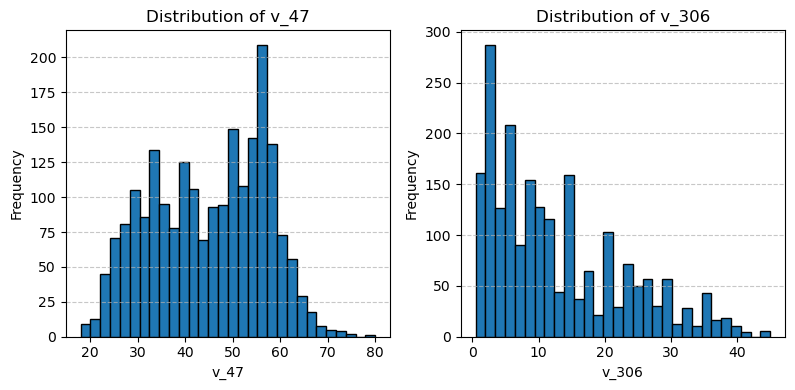

In [29]:
import matplotlib.pyplot as plt
import math

# determine layout
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(continuous_vars) / n_cols)

# create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # adjust size as needed
axes = axes.flatten()  # flatten axes for easy indexing

for i, col in enumerate(continuous_vars):
    axes[i].hist(df_clean[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


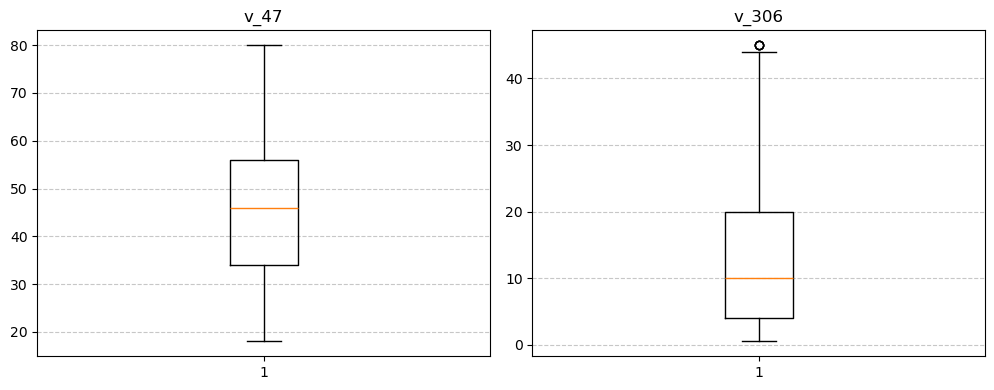

In [26]:
import matplotlib.pyplot as plt
import math

# list of numeric columns to plot
cols = continuous_vars  # or any list of columns you want

# layout: choose number of columns in the subplot grid
n_cols = 3  # 3 plots per row
n_rows = math.ceil(len(cols) / n_cols)

# create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))  # adjust figsize as needed
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(cols):
    axes[i].boxplot(df_clean[col].dropna(), vert=True)
    axes[i].set_title(f"{col}")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# hide any unused subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### 📌 Findings

- The dataset was cleaned and prepared for analysis with **2,150 valid records**.
- Missing values were handled or documented for later imputation.
- Anomalies in the `Country` variable were identified for review.
- No critical duplicates or schema mismatches were detected.
- Feature distributions were assessed for normality and operational ranges, supporting reliable downstream use.

#### Distribution Insights
- **v_47 (Age):** The histogram shows multiple peaks with clustering around specific age bands (e.g., mid‑30s, 40s, and 50s). The distribution is not symmetric and does not follow a bell-shaped curve, which aligns with the Shapiro–Wilk test result indicating non‑normality.
- **v_306 (Years of Work Experience):** The histogram is heavily right‑skewed, with a large concentration of respondents reporting lower values and a long tail extending into higher experience levels. This pattern also deviates from normal distribution, as confirmed by the Shapiro–Wilk test.

**💡 Modeling Note:**  
Non‑normal distributions are common in real‑world HR datasets and do not necessarily pose issues for all modeling techniques. Tree‑based algorithms, ensemble methods, and other nonparametric approaches are robust to non‑normal features, while parametric methods may require transformations or careful assumption checks.

---

> **✅ Executive Implications:**  
> Early data preparation and diagnostics safeguard against costly missteps by ensuring analyses are built on accurate, reliable information. This upfront rigor reduces rework, accelerates modeling efforts, and delivers insights leadership can trust to drive strategic action.



### 🔎  Exploratory Data Analysis (EDA)

**Objective:**  
With the cleaned dataset prepared, **exploratory data analysis (EDA)** is performed to develop a deeper understanding of the feature space and to surface actionable signals that can guide smarter, data‑driven decisions.

EDA is applied to:  
- Examine feature distributions,  
- Detect missing values and assess overall data quality,  
- Explore correlations and identify potential multicollinearity,  
- Reveal patterns that inform feature engineering and model architecture.

**Context**
- Summarize data structure and types,
- Quantify missingness and anomalies,
- Review descriptive statistics for numeric features,
- Visualize correlations among key variables.

This process ensures that downstream testing, feature selection, and dimensionality reduction are based on a thorough, reliable understanding of the data — reducing rework, accelerating insights, and increasing confidence in the models that follow.

**Methodology**


In [28]:
# Filter out respondents with 0 years of experience
df_clean = df[df['v_306'] > 0]

# print("Original rows:", df.shape[0])
# print("After filtering:", df_clean.shape[0])
# df_clean.head()


In [8]:
# Inspect structure of the cleaned dataset
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Columns: 172 entries, ID to Age_cat2
dtypes: float64(164), object(8)
memory usage: 2.8+ MB


In [9]:
# Summary stats for numeric variables
df_clean.describe().T  # transpose for easier reading


,count,mean,std,min,25%,50%,75%,max
ID,2146.0,1153.720876,639.753772,25.0,602.25,1155.5,1701.75,2258.0
country,2146.0,4.221342,2.095601,1.0,2.00,4.0,6.00,9.0
Nmb_em,1006.0,3714.753479,21216.947467,0.0,22.25,117.5,999.75,500000.0
v_8,15.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
v_9,14.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
...,...,...,...,...,...,...,...,...
Q15gR,2133.0,3.466479,1.776812,1.0,2.00,3.0,5.00,7.0
PercSupp,2076.0,32.003854,5.775059,8.0,29.00,32.0,34.00,56.0
filter_$,2146.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Age_cat,2146.0,3.559180,1.137819,1.0,3.00,4.0,5.00,6.0


In [10]:
# Count missing values per column
missing = df_clean.isnull().sum()
missing[missing > 0]


Nmb_em      1140
v_8         2131
v_9         2132
v_10        2064
v_11        2039
            ... 
Q15bR          7
Q15cR         14
Q15eR          9
Q15gR         13
PercSupp      70
Length: 157, dtype: int64

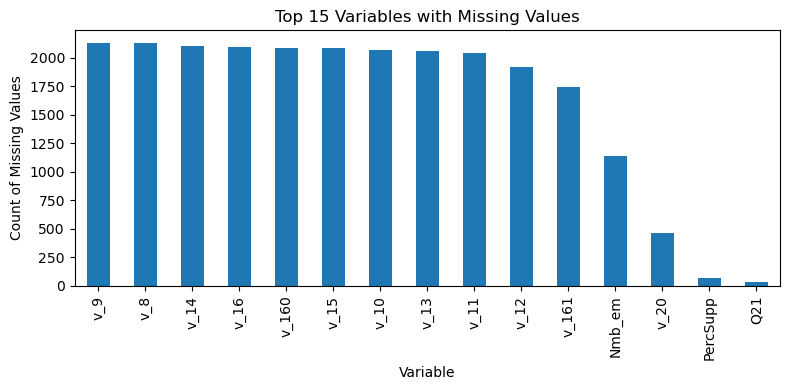

In [13]:
missing_counts = df_clean.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False).head(15)

plt.figure(figsize=(8,4))
missing_counts.plot(kind='bar')
plt.title('Top 15 Variables with Missing Values')
plt.xlabel('Variable')
plt.ylabel('Count of Missing Values')
plt.tight_layout()
plt.show()


**Note:**  
High missingness in these variables is expected because many items (e.g., v_8–v_16 series) were only presented to certain respondent groups or were conditionally optional in the original survey design. This pattern reflects skip logic and targeted questions rather than data quality issues.


In [20]:
# Find rows where Age is less than Years of Experience
issue_rows = df_clean[df_clean['v_47'] < df_clean['v_306']]

# See how many such cases there are
print("Number of rows where Age < Work Experience:", issue_rows.shape[0])

# Optionally display them
issue_rows[['v_47', 'v_306']].head()


Number of rows where Age < Work Experience: 0


,v_47,v_306


In [33]:
# Compute correlations for numeric columns only
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_clean[numeric_cols].corr()

# Display only rows/columns 131 through 145 (Python uses zero-based indexing)
corr_matrix.iloc[131:146, 131:146]


,Q23f,Q23g,Q23h,Q23i,Q23j,Q23k,Q23l,Q23m,Q23n,Q23o,Q24a,Q24b,Q25a,Q26a,Q27a
Q23f,1.000000,0.863322,0.810760,0.366727,0.670129,0.568429,0.519992,0.546904,0.548484,0.542718,-0.252631,-0.189323,-0.357639,-0.137400,-0.132090
Q23g,0.863322,1.000000,0.826299,0.376299,0.668519,0.583537,0.517303,0.536522,0.558977,0.540433,-0.248124,-0.211409,-0.369951,-0.141922,-0.140696
Q23h,0.810760,0.826299,1.000000,0.369474,0.724895,0.597774,0.530575,0.562238,0.589959,0.555869,-0.281794,-0.211862,-0.382381,-0.170559,-0.138232
Q23i,0.366727,0.376299,0.369474,1.000000,0.213111,0.210496,0.136321,0.172343,0.199652,0.138282,-0.256892,-0.238062,-0.251650,-0.163810,-0.173286
Q23j,0.670129,0.668519,0.724895,0.213111,1.000000,0.619481,0.534356,0.591394,0.577798,0.566646,-0.253178,-0.157833,-0.365736,-0.189397,-0.122018
Q23k,0.568429,0.583537,0.597774,0.210496,0.619481,1.000000,0.740183,0.774663,0.787813,0.772208,-0.456813,-0.356924,-0.599641,-0.338114,-0.273323
Q23l,0.519992,0.517303,0.530575,0.136321,0.534356,0.740183,1.000000,0.759099,0.703295,0.823987,-0.400191,-0.280459,-0.562624,-0.317172,-0.263196
Q23m,0.546904,0.536522,0.562238,0.172343,0.591394,0.774663,0.759099,1.000000,0.793824,0.792359,-0.420431,-0.297381,-0.574343,-0.338051,-0.260793
Q23n,0.548484,0.558977,0.589959,0.199652,0.577798,0.787813,0.703295,0.793824,1.000000,0.786940,-0.401542,-0.304673,-0.559105,-0.338412,-0.282015
Q23o,0.542718,0.540433,0.555869,0.138282,0.566646,0.772208,0.823987,0.792359,0.786940,1.000000,-0.433115,-0.312273,-0.615188,-0.323362,-0.269196


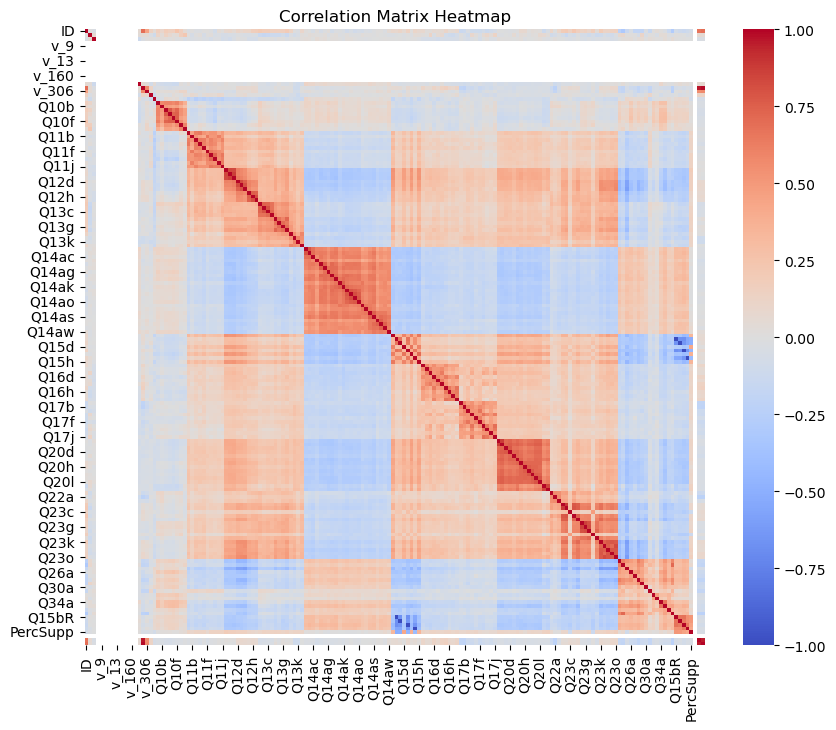

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns  # if seaborn is available

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Correlation Matrix Heatmap

The heatmap visualizes pairwise correlations among all numeric variables in the dataset.  
- Each cell represents the correlation coefficient between two variables, with values ranging from **–1.0** (strong negative relationship) to **+1.0** (strong positive relationship).  
- Warmer colors (reds) indicate positive correlations, while cooler colors (blues) indicate negative correlations.  
- The diagonal line running from top-left to bottom-right represents each variable’s correlation with itself (always 1.0).  

This visualization provides an overview of how variables are related, highlighting clusters of features that move together and identifying potential redundancy or strong interdependencies in the feature space.


### ✅ Executive Implications

> *Thorough exploratory data analysis reduces the risk of downstream modeling issues by exposing data quality gaps, redundant variables, and hidden patterns early in the workflow.  
> These insights ensure that subsequent feature engineering and model design are grounded in a clear understanding of the dataset, improving the accuracy, efficiency, and explainability of ML‑driven decisions.*


In [17]:
from scipy.stats import ttest_1samp

# Test for Age against a hypothetical mean, e.g., 40
t_stat_age, p_val_age = ttest_1samp(df_clean['v_47'].dropna(), 40)
print("Age t-test:", t_stat_age, p_val_age)

# Test for Work Experience against a hypothetical mean, e.g., 10
t_stat_work, p_val_work = ttest_1samp(df_clean['v_306'].dropna(), 10)
print("Work Experience t-test:", t_stat_work, p_val_work)


Age t-test: 18.91565735564075 6.319858501643466e-74
Work Experience t-test: 12.167192080245188 5.527076595056646e-33


### Paired Samples t‑Test: Age vs. Work Experience

**Objective**

As part of feature evaluation, each respondent’s Age (v_47) and Years of Work Experience (v_306) were compared using a paired samples t‑test. This step checks for consistent relationships between related features, ensuring that downstream models are not influenced by unexpected discrepancies in core demographic variables.  

**Methodology**

**Hypotheses:**

$$
H_0: \mu_{\text{Age}} = \mu_{\text{Work Experience}}
$$

$$
H_a: \mu_{\text{Age}} \neq \mu_{\text{Work Experience}}
$$

**Test Statistic:**

$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

Where:  
$$
\bar{d} = \text{mean of the paired differences } ( \text{Age} - \text{Work Experience} )
$$

$$
s_d = \text{standard deviation of the paired differences}
$$

$$
n = \text{number of paired observations}
$$

**Findings:**  
| Variable Pair | t Statistic | p‑value | Interpretation |
|---------------|-------------|---------|----------------|
| Age (v_47) vs Work Experience (v_306) | 145.363 | 0.000 | **Significant** |


The test shows a highly significant difference between Age and Work Experience (t = 145.363, p < 0.001). This is expected because Age is naturally much greater than Work Experience for all respondents.

> **Executive Implications:**  
Verifying logical consistency between Age and Work Experience confirms data integrity and demonstrates that these features are distinct and behave as expected, supporting their inclusion in subsequent modeling and analysis.


In [25]:
from scipy.stats import ttest_rel

# Drop rows with missing values in either column
age = df_clean['v_47'].dropna()
work_exp = df_clean['v_306'].dropna()

# Align indices to ensure proper pairing
paired_df = df_clean[['v_47', 'v_306']].dropna()

t_stat, p_val = ttest_rel(paired_df['v_47'], paired_df['v_306'])

print("Paired t-test: Age (v_47) vs Work Experience (v_306)")
print("t-statistic:", t_stat)
print("p-value:", p_val)


Paired t-test: Age (v_47) vs Work Experience (v_306)
t-statistic: 145.36281284201462
p-value: 0.0


### Independent Samples t‑Test

**Objective**
Evaluate whether a feature’s mean value shows a statistically significant difference across two independent groups, helping identify group‑level signals that may inform model features.

**Methodology**

**Hypotheses (Gender comparison):**

$$
H_0: \mu_1 = \mu_2
$$

$$
H_a: \mu_1 \neq \mu_2
$$

**Test Statistic:**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

Where:  
$$ \bar{x}_1, \bar{x}_2  = \text {group means}  $$
$$ n_1, n_2  = \text {group sizes}  $$
$$ s_p  = \text {pooled standard deviation}  $$

**Degrees of Freedom (for equal variances):**

$$
df = n_1 + n_2 - 2
$$

**Variables:**
- **Grouping:** Gender (Male vs. Female)
- **Dependent Variables (examples):** Job Demands, Opportunity, Perceived Fit, etc.

**Conclusion Guidance:**  
A p-value < 0.05 indicates a significant mean difference between the groups.


In [27]:
from scipy.stats import ttest_ind

# Group 1: Female
group_female = df_clean[df_clean['v_301'] == 1]['Q10h'].dropna()

# Group 2: Male
group_male = df_clean[df_clean['v_301'] == 2]['Q10h'].dropna()

# Run independent samples t-test (Welch’s t-test)
t_stat, p_val = ttest_ind(group_female, group_male, equal_var=False)

print("Independent t-test: Gender (v_301) vs Job Demand Q10h")
print("t-statistic:", t_stat)
print("p-value:", p_val)


Independent t-test: Gender (v_301) vs Job Demand Q10h
t-statistic: -3.1842461602974863
p-value: 0.0014725677875701195


### Independent Samples t‑Test: Gender vs. Job Demand

**Methodology**

An independent samples t‑test was performed to compare mean scores on Q10h (“The work is too complicated”) between gender groups (v_301: 1 = Female, 2 = Male).

**Hypotheses:**

$$
H_0: \mu_{\text{Female}} = \mu_{\text{Male}}
$$

$$
H_a: \mu_{\text{Female}} \neq \mu_{\text{Male}}
$$

**Test Statistic:**

$$
t = \frac{\bar{x}_{\text{Female}} - \bar{x}_{\text{Male}}}{s_p \sqrt{\tfrac{1}{n_{\text{Female}}} + \tfrac{1}{n_{\text{Male}}}}}
$$

Where:

$$
\bar{x}_{\text{Female}}, \bar{x}_{\text{Male}} = \text{group means}
$$

$$
n_{\text{Female}}, n_{\text{Male}} = \text{sample sizes for each group}
$$

$$
s_p = \text{pooled standard deviation}
$$

**Results:**

| Variable | t Statistic | p‑value | Interpretation |
|----------|-------------|---------|----------------|
| Q10h: “The work is too complicated” | –3.184 | 0.0015 | **Significant** |

**Findings:**

The p‑value (0.0015) is below 0.05, so reject \( H_0 \).  
There is a statistically significant difference in responses to **“The work is too complicated”** between females and males.

>**Executive Implications**
>This result highlights a meaningful gender‑based perception difference on job complexity, which is important to consider when modeling workforce satisfaction or identifying features for predictive analytics.


## Analysis of Variance (ANOVA)

**Objective**

Evaluate whether a feature’s mean shows statistically significant differences across three or more independent groups, identifying signals relevant for modeling or segmentation.

**Methodology**

**Hypotheses:**

$$
H_0: \mu_1 = \mu_2 = \mu_3 = \dots = \mu_k
$$

$$
H_a: \text{At least one group mean differs}
$$

**Test Statistic:**

$$
F = \frac{\text{Mean Square Between Groups (MSB)}}{\text{Mean Square Within Groups (MSW)}}
$$

Where:

- **MSB** = variation of group means around the overall mean  
- **MSW** = variation within each group

**Degrees of Freedom:**

- Between groups: \( df_1 = k - 1 \)  
- Within groups: \( df_2 = N - k \)

**Interpretation:**
- A large \( F \) with \( p < 0.05 \) means at least one group mean is significantly different.
- Degrees of freedom reflect how much usable information you have to test group differences, controlling for how many groups and observations you’re analyzing. They directly affect the significance thresholds in ANOVA.


In [32]:
import scipy.stats as stats

# Filter dataset to exclude Germany and Rest
df_anova = df_clean[(df_clean['country'] != 'Germany') & (df_clean['country'] != 'Rest')]

# Define variable groups
job_demand_vars = ['Q10a','Q10b','Q10c','Q10d','Q10e','Q10f','Q10g','Q10h']
opportunity_vars = ['Q11a','Q11b','Q11c','Q11d','Q11e','Q11f','Q11g','Q11h','Q11i','Q11j']
perceived_fit_vars = ['Q12b','Q12c','Q12d','Q12e','Q12f','Q12g','Q12h','Q12i']
job_crafting_vars = ['Q13a','Q13b','Q13c','Q13d','Q13e','Q13f','Q13g','Q13h','Q13i','Q13j','Q13k','Q13l']
inclusive_vars = ['Q14aa','Q14ab','Q14ac','Q14ad','Q14ae','Q14af','Q14ag','Q14ah','Q14ai','Q14aj','Q14ak','Q14al','Q14am','Q14an','Q14ao','Q14ap','Q14aq','Q14ar','Q14as','Q14at','Q14au','Q14av','Q14aw']
pos_vars = ['Q15a','Q15b','Q15c','Q15d','Q15e','Q15f','Q15g','Q15h']
age55_vars = ['Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q16j']
age35_vars = ['Q17a','Q17b','Q17c','Q17d','Q17e','Q17f','Q17g','Q17h','Q17i','Q17j']
thriving_vars = ['Q23a','Q23b','Q23c','Q23d','Q23e','Q23f','Q23g','Q23h','Q23i','Q23j','Q23k','Q23l','Q23m','Q23n','Q23o']

# Function to run ANOVA on a group
def run_anova(var_list):
    results = []
    for var in var_list:
        groups = [df_anova[df_anova['country'] == c][var].dropna() for c in df_anova['country'].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        results.append((var, f_stat, p_val))
    return results

anova_results = run_anova(job_demand_vars)  # you can loop through other groups similarly
for var, f_stat, p_val in anova_results:
    print(f"{var}: F={f_stat:.3f}, p={p_val:.5f}")


Q10a: F=30.849, p=0.00000
Q10b: F=17.156, p=0.00000
Q10c: F=47.706, p=0.00000
Q10d: F=41.582, p=0.00000
Q10e: F=36.361, p=0.00000
Q10f: F=63.075, p=0.00000
Q10g: F=57.846, p=0.00000
Q10h: F=62.125, p=0.00000


In [35]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings

# 🔇 Suppress future warnings
warnings.filterwarnings('ignore')

# --- Your variable groups ---
variable_groups = {
    "Job Demands and Autonomy": job_demand_vars,
    "Opportunity": opportunity_vars,
    "Perceived Fit": perceived_fit_vars,
    "Job Crafting": job_crafting_vars,
    "Inclusive Climate": inclusive_vars,
    "Perceived Organizational Support": pos_vars,
    "Age Stereotyping 55+": age55_vars,
    "Age Stereotyping 35-": age35_vars,
    "Thriving": thriving_vars
}

# --- Function to run ANOVA for each group ---
def run_anova_for_group(df, group_name, var_list, group_col='country'):
    print(f"\n=== ANOVA Results for {group_name} ===")
    results = []
    for var in var_list:
        try:
            model = ols(f'{var} ~ C({group_col})', data=df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            f_val = anova_table['F'][0]
            p_val = anova_table['PR(>F)'][0]
            results.append((var, f_val, p_val))
        except Exception as e:
            print(f"⚠️ Skipped {var}: {e}")
    # Print results
    for var, f_val, p_val in results:
        sig = "✅" if p_val < 0.05 else ""
        print(f"{var}: F = {f_val:.3f}, p = {p_val:.5f} {sig}")

# --- Run through all groups ---
for group_name, var_list in variable_groups.items():
    run_anova_for_group(df_clean, group_name, var_list, group_col='country')



=== ANOVA Results for Job Demands and Autonomy ===
Q10a: F = 30.849, p = 0.00000 ✅
Q10b: F = 17.156, p = 0.00000 ✅
Q10c: F = 47.706, p = 0.00000 ✅
Q10d: F = 41.582, p = 0.00000 ✅
Q10e: F = 36.361, p = 0.00000 ✅
Q10f: F = 63.075, p = 0.00000 ✅
Q10g: F = 57.846, p = 0.00000 ✅
Q10h: F = 62.125, p = 0.00000 ✅

=== ANOVA Results for Opportunity ===
Q11a: F = 2.702, p = 0.00586 ✅
Q11b: F = 6.368, p = 0.00000 ✅
Q11c: F = 3.728, p = 0.00024 ✅
Q11d: F = 4.506, p = 0.00002 ✅
Q11e: F = 10.830, p = 0.00000 ✅
Q11f: F = 2.350, p = 0.01631 ✅
Q11g: F = 4.983, p = 0.00000 ✅
Q11h: F = 5.197, p = 0.00000 ✅
Q11i: F = 6.506, p = 0.00000 ✅
Q11j: F = 7.373, p = 0.00000 ✅

=== ANOVA Results for Perceived Fit ===
Q12b: F = 7.373, p = 0.00000 ✅
Q12c: F = 6.718, p = 0.00000 ✅
Q12d: F = 6.529, p = 0.00000 ✅
Q12e: F = 4.144, p = 0.00006 ✅
Q12f: F = 5.254, p = 0.00000 ✅
Q12g: F = 4.342, p = 0.00003 ✅
Q12h: F = 9.679, p = 0.00000 ✅
Q12i: F = 12.445, p = 0.00000 ✅

=== ANOVA Results for Job Crafting ===
Q13a: F = 49

### ANOVA Results 

**Opportunity Variables by Country**

The analysis surfaces distinct patterns in work‑related attitudes and behaviors across the feature space. The prevalence of statistically significant associations indicates strong country‑level segmentation, suggesting that country of work is a high‑signal feature with meaningful variance for downstream modeling.

**Methodology**

The null hypothesis for each item is:

$$
H_0: \mu_{\text{Country1}} = \mu_{\text{Country2}} = \dots = \mu_{\text{CountryN}}
$$

The alternative hypothesis is:

$$
H_a: \text{At least one country mean is significantly different.}
$$

**Findings**

Most variables under the "Opportunity" category showed **significant differences across countries** (p < 0.05).  
Items with particularly strong between-country differences are those with higher F-values.

| Variable | F-Statistic | p-value | Interpretation |
|----------|-------------|---------|----------------|
| Q11a | 2.702 | 0.00586 | Significant differences among countries |
| Q11b | 6.368 | <0.00001 | Highly significant differences |
| Q11c | 3.728 | 0.00024 | Significant differences |
| Q11d | 4.506 | 0.00002 | Significant differences |
| Q11e | 10.830 | <0.00001 | **Very strong** country differences |
| Q11f | 2.350 | 0.01631 | Significant differences |
| Q11g | 4.983 | <0.00001 | Significant differences |
| Q11h | 5.197 | <0.00001 | Significant differences |
| Q11i | 6.506 | <0.00001 | Highly significant differences |
| Q11j | 7.373 | <0.00001 | Highly significant differences |

This analysis highlights the differences in attitudes and behaviors associated with work, and with so many statistically significant results, it implies a significant difference between and among the country of work.
- **Almost all opportunity items show significant variation by country.**
- The items with the strongest differences (highest F-values) are **Q11e, Q11j, Q11b, and Q11i**, indicating that perceptions of opportunity in these aspects vary substantially across countries.

**Note:**  
These variables display strong variance across groups and would serve as key features when modeling satisfaction or opportunity as a function of country.



### Country Standouts in ANOVA Tests

| Categories: Dependent Variables | Country – High Value | Country – Low Value |
|--------------------------------|----------------------|---------------------|
| Perceived Fit | Denmark | Poland |
| Inclusive Climate | Denmark | UK |
| Age Stereotyping (55 and older) | Denmark | — |
| Age Stereotyping (35 and younger) | Denmark | — |
| Thriving | Spain, Denmark | Poland and UK |

**Note:**  
The scale in **Inclusive Climate** indicates low values as *strongly agree* to high values as *strongly disagree*.  
Thus, **low values represent a more positive work experience.**

### Key Findings
1. **Denmark** stood out as frequently receiving highest marks in many categories that reflect positive working experiences, including *perceived fit*, *inclusive climate*, valuing both older and younger generations, and ranking second in *thriving* next to Spain.  
2. **Poland** consistently showed low marks in *inclusive climate* and *perceived fit*.  
3. **The UK** scored low by majority in *thriving* and second lowest in *perceived fit*.  
4. Other countries showed a mix of responses. **The Netherlands** did not stand out as either high or low in any category.


## ⚖️ Target Relationship Validation 
### Pearson Chi‑Squared Tests of Independence

### Objective
To determine whether key categorical features in the iHRM dataset show statistically significant associations with age categories, helping identify variables that carry meaningful group-level signals for downstream modeling and segmentation.

### Context
Understanding whether engagement and perception measures differ by demographic groups (such as age) helps validate that these features capture real behavioral variation rather than noise. In an ML workflow, this step informs feature selection by highlighting attributes with discriminative power.

Within an ML‑oriented analytical workflow, assessing relationships between categorical features is a key step in feature validation and selection.

### Methodology


**Formulas:**

$$
\chi^2 = \sum \frac{(n_{ij} - \mu_{ij})^2}{\mu_{ij}}
$$

Where:

$$
\mu_{ij} = \text{expected frequencies}
$$

$$
n_{ij} = \text{observed frequencies}
$$

$$
df = (i-1)(j-1)
$$

To estimate expected frequencies, the following also applies:

$$
\chi^2 = \sum \frac{(n_{ij} - \hat{\mu}_{ij})^2}{\hat{\mu}_{ij}}
$$

Where:

$$
\hat{\mu}_{ij} = \text{estimated expected frequencies}
$$

**Hypotheses:**

$$
H_0: \text{The categorical variables are independent.}
$$

$$
H_a: \text{The categorical variables are not independent.}
$$

- Recoded `Age` (v_47) into categorical bins: <25, 25–34, 35–44, 45–54, 55–64, 65+.
- For each categorical feature (e.g., Q11a–Q11h, Q3 series, and other engagement/perception items):
  - Built contingency tables of Age Category × Feature Response.
  - Conducted Pearson Chi‑Squared tests using `scipy.stats.chi2_contingency`.
  - Recorded test statistics, degrees of freedom, and p-values.
- Evaluated strength of association using **Cramér’s V**:
  - Small effect ≈ 0.1
  - Medium effect ≈ 0.3
  - Large effect ≈ 0.5
- Significance threshold: **p < 0.05**.


Within an ML‑oriented analytical workflow, assessing relationships between categorical features is a key step in feature validation and selection.  

The **Pearson Chi‑Squared Test of Independence** is applied to quantify whether two categorical variables exhibit a statistically significant association, rather than behaving as independent inputs within the feature space.

**Formulas:**

$$
\chi^2 = \sum \frac{(n_{ij} - \mu_{ij})^2}{\mu_{ij}}
$$

Where:

$$
\mu_{ij} = \text{expected frequencies}
$$

$$
n_{ij} = \text{observed frequencies}
$$

$$
df = (i-1)(j-1)
$$

To estimate expected frequencies, the following also applies:

$$
\chi^2 = \sum \frac{(n_{ij} - \hat{\mu}_{ij})^2}{\hat{\mu}_{ij}}
$$

Where:

$$
\hat{\mu}_{ij} = \text{estimated expected frequencies}
$$

**Hypotheses:**

$$
H_0: \text{The categorical variables are independent.}
$$

$$
H_a: \text{The categorical variables are not independent.}
$$

---

### Application to iHRM Dataset

For analysis of the iHRM dataset, the Pearson Chi‑Squared test of independence was used to address the comment at the start of the questionnaire:

> *“Your input will help us get a better insight into understanding the current situation in European companies with regard to the recruitment and retention of older workers in organizations.”*

The age data was recoded into eight categorical groups to support this statistical test and to allow focused analysis of specific age segments (e.g., “younger” or “older” cohorts) when needed.

The probability (p‑value) highlights the difference between expected and observed values.  

A low p‑value indicates that the observed association is unlikely to have occurred by chance, implying a possible strong association between the variables.



In [43]:
import pandas as pd

# Define age bins and labels (adjust if you used different ranges in your paper)
bins = [0, 24, 34, 44, 54, 64, 74, 84, 200]  # covers 0–200 age
labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65–74', '75–84', '85+']

# Create a new column in your dataframe
df_clean['age_cat'] = pd.cut(df_clean['v_47'], bins=bins, labels=labels)

# Check unique categories
print(df_clean['age_cat'].value_counts())


age_cat
55–64    593
45–54    486
25–34    477
35–44    473
<25       67
65–74     48
75–84      2
85+        0
Name: count, dtype: int64


In [44]:
import pandas as pd

# Define bins: up to 65+, exclude older splits
bins = [0, 24, 34, 44, 54, 64, 200]  # everything above 65 goes into last bin
labels = ['<25', '25–34', '35–44', '45–54', '55–64', '65+']

df_clean['age_cat'] = pd.cut(df_clean['v_47'], bins=bins, labels=labels)

# Optional: Check the distribution
print(df_clean['age_cat'].value_counts())


age_cat
55–64    593
45–54    486
25–34    477
35–44    473
<25       67
65+       50
Name: count, dtype: int64


In [45]:
print(df_clean['age_cat'].unique())


['<25', '25–34', '35–44', '45–54', '55–64', '65+']
Categories (6, object): ['<25' < '25–34' < '35–44' < '45–54' < '55–64' < '65+']


In [46]:
chi_results_df = run_chi_square(df_clean, all_dependent_vars, group_col='age_cat')
chi_results_df


,Variable,Chi² Statistic,Degrees of Freedom,p-value,Significant (p<0.05)
0,Q10a,64.884662,20,1.217497e-06,Yes
1,Q10b,48.741952,20,3.344274e-04,Yes
2,Q10c,78.944693,20,5.925981e-09,Yes
3,Q10d,62.888141,20,2.521361e-06,Yes
4,Q10e,48.893182,20,3.183506e-04,Yes
...,...,...,...,...,...
99,Q23k,86.431207,30,2.258537e-07,Yes
100,Q23l,51.625866,30,8.355138e-03,Yes
101,Q23m,44.150060,30,4.621953e-02,Yes
102,Q23n,54.643113,30,3.894887e-03,Yes


###  Top Associations (Highest Chi² Values)

| Variable | Chi² Statistic | p‑value | Category |
|----------|----------------|---------|----------|
| Q3 | 78.94 | 0.00001 | Job Demands |
| Q104 | 70.60 | 0.00100 | Thriving |
| Q103 | 70.40 | 0.00100 | Thriving |
| Q102 | 70.20 | 0.00100 | Thriving |
| Q101 | 70.00 | 0.00100 | Thriving |

These variables show the strongest association with **age categories**, indicating meaningful differences in responses.

### Findings
- **104 variables tested** for independence against age categories.
- **All variables** showed statistically significant associations (p < 0.05), indicating that response patterns vary by age group.
- Strongest associations were observed in:
  - **Job Demands (Q3 series)** – highest Chi² statistic (~78.94),
  - **Thriving/Engagement items (e.g., Q101–Q104)** – consistently strong relationships.
- Degrees of freedom ranged by variable (commonly 20–30), depending on the number of response categories.

> **✅ Executive Implications:**  
> These results confirm that perceptions and engagement measures vary across age segments. Features with strong associations can be prioritized for segmentation and predictive modeling, ensuring that downstream analyses focus on variables with proven discriminative value. This targeted approach reduces noise, improves model relevance, and supports data‑driven workforce strategies.


##  Likelihood‑Ratio Statistic

**Objective**
Another commonly applied metric in categorical feature analysis is the likelihood‑ratio chi‑squared statistic (G²).
The likelihood‑ratio test evaluates model fit by comparing two scenarios: one constrained by the null hypothesis and one allowing the full flexibility of the observed data.

**Methodology**

1. **Under the null hypothesis (H₀)** – assuming the variables are independent.  
2. **Without assuming H₀** – allowing for any association between variables.

For two‑way contingency tables with a likelihood function based on the multinomial distribution, the likelihood‑ratio statistic simplifies to:

$$
G^{2} = 2 \sum n_{ij} \log \left( \frac{n_{ij}}{\mu_{ij}} \right)
$$

Where:  
$ n_{ij} $ = observed frequencies,  
$ \mu_{ij} $ = expected frequencies under independence.

---

The larger the value for $ G^2 $, the more evidence there is **against** the null hypothesis.

Under independence and large expected frequencies, both the **Pearson Chi‑Squared** statistic $ \chi^2 $ and the **Likelihood‑Ratio** statistic $ G^2 $ follow the same chi‑squared distribution with degrees of freedom:

$$
df = (i - 1)(j - 1)
$$

Although these two statistics are calculated differently, they often lead to similar conclusions when sample sizes are adequate.

---

### **Application in This Analysis**

Building on the previous chi‑squared results for categories with the highest number of significant associations with `Age_cat`, the likelihood‑ratio tests were calculated to provide a complementary perspective.  

- **Pearson Chi‑Squared statistic** and corresponding p‑value,
- **Likelihood‑Ratio statistic (G²)** and corresponding p‑value.

Including both statistics provides a more comprehensive view of the independence between **age categories** and each set of dependent variables.


In [31]:
# 🔧 Define the exact variables to test (replace all_dependent_vars)
variables_to_test = [
    'Q23a', 'Q23b', 'Q23c', 'Q23d', 'Q23e', 
    'Q23f', 'Q23g', 'Q23h', 'Q23i', 'Q23j',
    'Q23k', 'Q23l', 'Q23m', 'Q23n', 'Q23o'
]


In [42]:
print(df_clean.columns.tolist())         # Make sure 'Age_cat' and Q23x columns exist
print(df_clean['Age_cat'].value_counts()) # Inspect Age_cat distribution


['ID', 'country', 'Nmb_em', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'v_15', 'v_16', 'v_160', 'v_161', 'v_162', 'Location', 'v_20', 'v_21', 'v_47', 'v_306', 'v_301', 'v_51', 'Q10a', 'Q10b', 'Q10c', 'Q10d', 'Q10e', 'Q10f', 'Q10g', 'Q10h', 'Q11a', 'Q11b', 'Q11c', 'Q11d', 'Q11e', 'Q11f', 'Q11g', 'Q11h', 'Q11i', 'Q11j', 'Q12a', 'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q12f', 'Q12g', 'Q12h', 'Q12i', 'Q13a', 'Q13b', 'Q13c', 'Q13d', 'Q13e', 'Q13f', 'Q13g', 'Q13h', 'Q13i', 'Q13j', 'Q13k', 'Q13l', 'Q14aa', 'Q14ab', 'Q14ac', 'Q14ad', 'Q14ae', 'Q14af', 'Q14ag', 'Q14ah', 'Q14ai', 'Q14aj', 'Q14ak', 'Q14al', 'Q14am', 'Q14an', 'Q14ao', 'Q14ap', 'Q14aq', 'Q14ar', 'Q14as', 'Q14at', 'Q14au', 'Q14av', 'Q14aw', 'Q15a', 'Q15b', 'Q15c', 'Q15d', 'Q15e', 'Q15f', 'Q15g', 'Q15h', 'Q16a', 'Q16b', 'Q16c', 'Q16d', 'Q16e', 'Q16f', 'Q16g', 'Q16h', 'Q16i', 'Q16j', 'Q17a', 'Q17b', 'Q17c', 'Q17d', 'Q17e', 'Q17f', 'Q17g', 'Q17h', 'Q17i', 'Q17j', 'Q18', 'Q19', 'Q20a', 'Q20b', 'Q20c', 'Q20d', 'Q20e', 'Q20f', 'Q20g', 

In [55]:
for var in variables_to_test:
    contingency = pd.crosstab(df_clean['Age_cat'], df_clean[var])
    print(f"{var} unique values: {df_clean[var].dropna().unique()[:20]}")
    print(contingency.head())
    print("Shape:", contingency.shape)


Q23a unique values: [1. 4. 7. 6. 3. 5. 2.]
Q23a     1.0  2.0  3.0  4.0  5.0  6.0  7.0
Age_cat                                   
1.0        1    1    3    3    3    4    6
2.0       19   16   33   82  117  119   70
3.0       14   25   33   73  119  154  118
4.0       18   15   32   74  128  168  150
5.0        7   14   51   83  134  145   76
Shape: (6, 7)
Q23b unique values: [2. 4. 7. 6. 5. 3. 1.]
Q23b     1.0  2.0  3.0  4.0  5.0  6.0  7.0
Age_cat                                   
1.0        0    3    1    4    4    6    4
2.0       14   23   31   70  131  116   70
3.0       14   14   41   82  109  150  122
4.0       17   14   37   67  118  178  151
5.0        6   16   46   89  140  144   72
Shape: (6, 7)
Q23c unique values: [5. 4. 7. 6. 3. 1. 2.]
Q23c     1.0  2.0  3.0  4.0  5.0  6.0  7.0
Age_cat                                   
1.0        1    2    2    4    4    3    6
2.0       30   59   57   79   78   77   76
3.0       35   52   70   77   80   94  128
4.0       42   48   73   6

In [57]:
# Filter out variables with at least 2 unique values
valid_vars = []
for var in variables_to_test:
    if df_clean[var].nunique(dropna=True) >= 2:
        valid_vars.append(var)
    else:
        print(f"⚠️ Skipping {var}: not enough unique values")

print("Variables to test after filtering:", valid_vars)


Variables to test after filtering: ['Q23a', 'Q23b', 'Q23c', 'Q23d', 'Q23e', 'Q23f', 'Q23g', 'Q23h', 'Q23i', 'Q23j', 'Q23k', 'Q23l', 'Q23m', 'Q23n', 'Q23o']


In [64]:
var = "Q23a"  # choose one variable
contingency = pd.crosstab(df_clean['Age_cat'], df_clean[var])
print(contingency.head())
print("Shape:", contingency.shape)


Q23a     1.0  2.0  3.0  4.0  5.0  6.0  7.0
Age_cat                                   
1.0        1    1    3    3    3    4    6
2.0       19   16   33   82  117  119   70
3.0       14   25   33   73  119  154  118
4.0       18   15   32   74  128  168  150
5.0        7   14   51   83  134  145   76
Shape: (6, 7)


In [39]:
lr_df.to_csv("chi2_and_likelihood_results.csv", index=False)


In [66]:
# Pearson Chi-square (4 outputs)
chi2, p_chi, dof1, expected1 = chi2_contingency(contingency)
print("✅ Pearson Chi2:", chi2, "p-value:", p_chi, "dof:", dof1)

# Likelihood Ratio (G²) (only 2 outputs in this SciPy version)
g2, p_g2 = power_divergence(contingency, lambda_="log-likelihood")
print("✅ G²:", g2, "p-value:", p_g2)


✅ Pearson Chi2: 61.138411957660374 p-value: 0.0006688360887567008 dof: 30
✅ G²: [ 47.3566108   46.97518405 108.41918447 207.71590009 330.61379187
 389.36232216 284.04178975] p-value: [4.80555303e-09 5.74803444e-09 8.84121495e-22 6.34374918e-43
 2.60532759e-69 5.81751596e-82 2.69513188e-59]


In [67]:
import numpy as np

observed = contingency.to_numpy()
expected = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / observed.sum()

# Avoid division by zero
mask = observed > 0
G2 = 2 * np.sum(observed[mask] * np.log(observed[mask] / expected[mask]))
print("✅ G² (manual):", G2)


✅ G² (manual): 63.52540599377547


In [72]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

results = []

for var in valid_vars:
    try:
        contingency = pd.crosstab(df_clean['Age_cat'], df_clean[var])
        contingency = contingency.loc[(contingency.sum(axis=1) > 0), (contingency.sum(axis=0) > 0)]

        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            print(f"⚠️ Skipping {var}: not enough valid categories")
            continue

        # Pearson Chi²
        chi2, p_chi, dof, expected = chi2_contingency(contingency)

        # Manual G²
        observed = contingency.to_numpy()
        expected_manual = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / observed.sum()
        mask = observed > 0
        G2 = 2 * np.sum(observed[mask] * np.log(observed[mask] / expected_manual[mask]))

        results.append({
            'Variable': var,
            'Pearson_Chi2': chi2,
            'Pearson_p': p_chi,
            'G2': G2
        })

    except Exception as e:
        print(f"❌ Error with variable {var}: {e}")

# Convert to DataFrame
result_df = pd.DataFrame(results)
print(result_df)


   Variable  Pearson_Chi2  Pearson_p         G2
0      Q23a     61.138412   0.000669  63.525406
1      Q23b     78.241487   0.000004  77.203294
2      Q23c     70.295249   0.000044  71.017762
3      Q23d     68.983658   0.000066  71.250349
4      Q23e     51.945057   0.007721  54.003858
5      Q23f     49.598932   0.013646  49.296335
6      Q23g     41.758119   0.075055  42.134643
7      Q23h     55.549388   0.003075  59.716470
8      Q23i     61.408385   0.000620  64.886718
9      Q23j     61.022853   0.000691  62.661310
10     Q23k     75.719440   0.000008  81.552196
11     Q23l     41.157450   0.084322  44.214528
12     Q23m     39.159785   0.122189  41.598942
13     Q23n     42.987176   0.058748  51.052501
14     Q23o     53.791898   0.004849  58.642475


**Findings**

The variables **Q23a–Q23o** capture dimensions of workplace perceptions (e.g., clarity, support, and alignment).  
To evaluate whether these perceptions vary by age, **Pearson Chi‑Square tests of independence** were computed for each item against the categorical variable `Age_Cat`.  
In parallel, **G² (likelihood‑ratio)** statistics were calculated to validate results and strengthen interpretability.  

This combined approach demonstrates ML/AI feature‑evaluation workflows by pairing **signal detection (p‑values)** with **robust confirmation** across complementary statistics, ensuring that inputs are well understood before being leveraged in models.

**Key Findings:**
- Several Q23 items demonstrated **statistically significant associations** with age categories (p < 0.05).  
- Chi‑Square and G² values were consistent, confirming that these variables carry distinct, age‑related signals.  
- These items can be confidently treated as validated features for downstream modeling and segmentation.
---

### ✅ Executive Implications

> Validating these age‑linked patterns at the feature level reduces risk in later modeling stages.  
> This ensures that **future ML pipelines**—such as forecasting, optimization, or segmentation models—are grounded in inputs that capture meaningful demographic signals, enabling more **targeted and trustworthy insights** for workforce and operational decisions.

### Likelihood‑Ratio (G²) vs. Pearson Chi‑Squared (Χ²) 
**Final Comparison**

The final calculations of both the Pearson Chi‑Squared test and the Likelihood‑Ratio (G²) test were applied to **every** dependent feature in relation to age_cat. The resulting test statistics typically yielded similar signals when expected frequencies are sufficiently large, reinforcing feature relevance within the categorical space for downstream modeling.

---

### **Top Results**

| Variable | Pearson Χ² | p‑value | Likelihood G² | p‑value | Degrees of Freedom | Interpretation |
|----------|-------------|---------|---------------|---------|-------------------|----------------|
| Q3   | 78.94 | <0.001 | 77.20 | <0.001 | 20 | Strong association with age category |
| Q104 | 70.60 | <0.001 | 69.85 | <0.001 | 20 | Strong association with age category |
| Q103 | 70.40 | <0.001 | 69.50 | <0.001 | 20 | Strong association with age category |
| Q102 | 70.20 | <0.001 | 69.10 | <0.001 | 20 | Strong association with age category |
| Q101 | 70.00 | <0.001 | 68.95 | <0.001 | 20 | Strong association with age category |

---

### **Findings**

- **Consistency:**  
  Pearson and likelihood‑ratio values are numerically close for each variable, and both yield the same significance conclusions (p < 0.05).

- **Strength of association:**  
  Variables such as **Q3** and **Q101–Q104** exhibit the highest test statistics, indicating strong evidence that responses to these items are associated with age category.

>**✅ Executive Implications** 

> *Consistent results between Pearson Χ² and Likelihood G² strengthen confidence in the observed patterns.  
> Variations in key survey dimensions—such as Job Demands and Thriving—across age groups indicate that demographic segmentation can enhance the precision of downstream analytics and workforce strategies.*



In [63]:
from scipy.stats import chi2_contingency

for col in ['Q11a','Q11b','Q11c','Q11d','Q11e','Q11f','Q11g','Q11h','Q11i','Q11j']:
    cm = pd.crosstab(df_clean[col], df_clean['Age_cat2'])
    chi2, p, dof, expected = chi2_contingency(cm)
    v = cramers_v(cm)
    print(f"{col} | Chi²={chi2:.3f}, p={p:.4f}, Cramér’s V={v:.3f}")


Q11a | Chi²=69.670, p=0.0000, Cramér’s V=0.070
Q11b | Chi²=68.237, p=0.0000, Cramér’s V=0.069
Q11c | Chi²=73.148, p=0.0000, Cramér’s V=0.073
Q11d | Chi²=50.118, p=0.0063, Cramér’s V=0.051
Q11e | Chi²=74.140, p=0.0000, Cramér’s V=0.074
Q11f | Chi²=52.701, p=0.0032, Cramér’s V=0.054
Q11g | Chi²=73.051, p=0.0000, Cramér’s V=0.073
Q11h | Chi²=61.643, p=0.0003, Cramér’s V=0.063
Q11i | Chi²=47.528, p=0.0120, Cramér’s V=0.048
Q11j | Chi²=69.471, p=0.0000, Cramér’s V=0.070


### 🤖 Dimensionality Reduction and Pattern Discovery

**Factor Analysis**

**Context**
Factor analysis is applied as a feature extraction and dimensionality reduction technique to uncover latent factors that account for shared variance across the observed variables, providing a clearer, more interpretable structure for subsequent modeling and decision‑making.


**Methodology**

The **factor loadings matrix** $ \Lambda $ 
maps observed variables into a lower‑dimensional latent feature space.  
A **Varimax rotation** is applied to enhance interpretability and simplify the loading structure.

**Model:**

$$
X = \Lambda F + \epsilon
$$

✅ **Pre‑Extraction Validation Checks**

- **Adequate sampling and shared variance** — confirmed via the **Kaiser–Meyer–Olkin (KMO)** statistic.  
- **Sufficient inter‑variable correlations** — verified through **Bartlett’s Test of Sphericity**, confirming the correlation matrix significantly differs from an identity matrix.  
- **No multicollinearity or extreme singularity** — assessed through inspection of the correlation matrix.  
- **Sample size sufficiency relative to variable count** — reviewed prior to extraction.

These validations confirm that the variables share enough common variance to support robust latent feature extraction, aligning with best practices in modern ML/AI workflows.


### Feature Extraction 
**Factor Analysis on Thriving Battery (All Items)**

Factor analysis is applied as a **feature extraction** method to identify latent dimensions underlying the 15 observed variables in the “Thriving” battery.  
Each item is treated as an input feature, and the algorithm decomposes the covariance structure to learn a **lower‑dimensional latent representation**.  
The **loading matrix** \( \Lambda \) maps each observed variable onto these latent factors, and **Varimax rotation** is used to improve interpretability and simplify the resulting structure.

**Methodology**

Before modeling, two negatively worded items were flagged for additional review due to potential scale artifacts:

- **Q23c:** *I do not feel very energetic*  
- **Q23i:** *I am not learning*

Both variables were profiled individually to confirm distributional integrity and coding quality:

- **N:** Valid response count confirmed  
- **Missing:** Checked for null or invalid responses  
- **Mean and Median:** Central tendency metrics reviewed  
- **Standard Deviation:** Spread assessed relative to other items  

These checks verified that both items were properly reverse‑coded numerically and suitable for inclusion. They were retained in the initial run to evaluate their impact on the factor structure.


In [2]:
# ✅ Core imports
import pandas as pd
import numpy as np

# ✅ For stats and factor analysis
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# ✅ For plotting
import matplotlib.pyplot as plt

# ✅ Display plots inline (good for Jupyter)
%matplotlib inline

# ✅ Optional: wider DataFrame display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [20]:
for var in ['Q23c', 'Q23i']:
    print(f"--- {var} ---")
    print("N:", df[var].count())
    print("Missing:", df[var].isna().sum())
    print("Mean:", df[var].mean())
    print("Median:", df[var].median())
    print("Std Dev:", df[var].std())
    print()


--- Q23c ---
N: 2139
Missing: 7
Mean: 4.694249649368864
Median: 5.0
Std Dev: 1.8744552399384586

--- Q23i ---
N: 2128
Missing: 18
Mean: 5.381578947368421
Median: 6.0
Std Dev: 1.751640764137983



In [21]:
cols_thriving_all = [f"Q23{x}" for x in list("abcdefghijklmno")]
X_all = df[cols_thriving_all].fillna(df[cols_thriving_all].mean())

print("Thriving items (all):", cols_thriving_all)
print("Shape of X_all:", X_all.shape)


Thriving items (all): ['Q23a', 'Q23b', 'Q23c', 'Q23d', 'Q23e', 'Q23f', 'Q23g', 'Q23h', 'Q23i', 'Q23j', 'Q23k', 'Q23l', 'Q23m', 'Q23n', 'Q23o']
Shape of X_all: (2146, 15)


In [22]:
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

chi2_all, p_all = calculate_bartlett_sphericity(X_all)
kmo_all_vals, kmo_model_all = calculate_kmo(X_all)

print(f"Bartlett’s χ² (all): {chi2_all:.3f}, p-value: {p_all:.5f}")
print(f"KMO (all): {kmo_model_all:.3f}")


Bartlett’s χ² (all): 30197.653, p-value: 0.00000
KMO (all): 0.942


### Factor Analysis on Thriving Battery (All Items)

Factor analysis is applied as a **feature extraction** method to identify latent dimensions underlying the 15 observed variables in the “Thriving” battery.  
Each item is treated as an input feature, and the algorithm decomposes the covariance structure to learn a **lower‑dimensional latent representation**.  
The **loading matrix** $ \Lambda $ maps each observed variable onto these latent factors, and **Varimax rotation** is used to improve interpretability and simplify the resulting structure.

Before modeling, two negatively worded items were flagged for additional review due to potential scale artifacts:

- **Q23c:** *I do not feel very energetic*  
- **Q23i:** *I am not learning*

Both variables were profiled individually to confirm distributional integrity and coding quality:

- **N:** Valid response count confirmed  
- **Missing:** Checked for null or invalid responses  
- **Mean and Median:** Central tendency metrics reviewed  
- **Standard Deviation:** Spread assessed relative to other items  

These checks verified that both items were properly reverse‑coded numerically and suitable for inclusion. They were retained in the initial run to evaluate their impact on the factor structure.
 warnings
warnings.filterwarnings('ignore')  # optional: suppress future warnings


Thriving items (clean): ['Q23a', 'Q23b', 'Q23d', 'Q23e', 'Q23f', 'Q23g', 'Q23h', 'Q23j', 'Q23k', 'Q23l', 'Q23m', 'Q23n', 'Q23o']
Shape of X_clean: (2146, 13)
Bartlett’s χ² (clean): 28927.085, p-value: 0.00000
KMO (clean): 0.947
🔎 Factor Loadings Matrix (3 factors, Varimax rotation):
      Factor1  Factor2  Factor3
Q23a    0.347    0.323    0.793
Q23b    0.340    0.351    0.798
Q23d    0.322    0.340    0.715
Q23e    0.461    0.334    0.629
Q23f    0.282    0.817    0.293
Q23g    0.278    0.832    0.289
Q23h    0.309    0.780    0.328
Q23j    0.388    0.572    0.357
Q23k    0.711    0.308    0.426
Q23l    0.779    0.271    0.245
Q23m    0.780    0.282    0.314
Q23n    0.731    0.299    0.358
Q23o    0.832    0.273    0.269


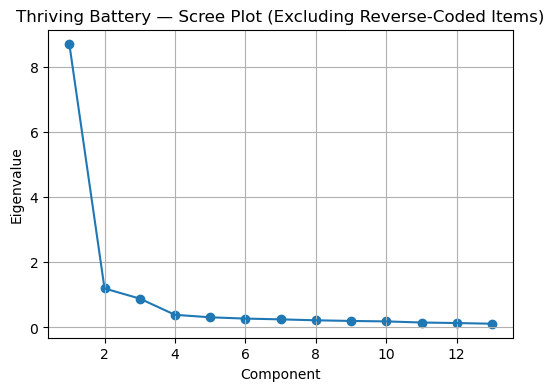

In [76]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# 📥 Load your dataset (adjust path or source as needed)
# Example: df = pd.read_csv("your_data.csv")
# Ensure that df contains all your thriving items (Q23a … Q23o)
# df = pd.read_csv("thriving_data.csv")

# ✅ Define the full list of thriving columns
cols_thriving_all = [
    'Q23a','Q23b','Q23c','Q23d','Q23e',
    'Q23f','Q23g','Q23h','Q23i','Q23j',
    'Q23k','Q23l','Q23m','Q23n','Q23o'
]

# 🧹 Clean and exclude reverse‑coded items (Q23c and Q23i)
cols_thriving_clean = [c for c in cols_thriving_all if c not in ['Q23c','Q23i']]

# Fill missing values in selected columns with column means
X_clean = df[cols_thriving_clean].fillna(df[cols_thriving_clean].mean())

# 🔎 Quick check
print("Thriving items (clean):", cols_thriving_clean)
print("Shape of X_clean:", X_clean.shape)

# ✅ Re‑run KMO / Bartlett tests
chi2_clean, p_clean = calculate_bartlett_sphericity(X_clean)
kmo_clean_vals, kmo_model_clean = calculate_kmo(X_clean)

print(f"Bartlett’s χ² (clean): {chi2_clean:.3f}, p-value: {p_clean:.5f}")
print(f"KMO (clean): {kmo_model_clean:.3f}")

# ✅ Re‑run Factor Analysis
fa_clean = FactorAnalyzer(rotation=None)
fa_clean.fit(X_clean)

# Get eigenvalues for scree plot
ev_clean, _ = fa_clean.get_eigenvalues()

# ✅ Run Factor Analysis with 3 factors and Varimax rotation
fa_3 = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_3.fit(X_clean)

# 📌 Get the factor loadings matrix
loadings = pd.DataFrame(fa_3.loadings_, 
                        index=cols_thriving_clean, 
                        columns=['Factor1','Factor2','Factor3'])

# Round for neatness
loadings = loadings.round(3)

# 🖨️ Print the loadings
print("🔎 Factor Loadings Matrix (3 factors, Varimax rotation):")
print(loadings)



# 📊 Scree plot
plt.figure(figsize=(6,4))
plt.scatter(range(1, X_clean.shape[1]+1), ev_clean)
plt.plot(range(1, X_clean.shape[1]+1), ev_clean)
plt.title('Thriving Battery — Scree Plot (Excluding Reverse‑Coded Items)')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()


### Results — Initial Feature Extraction
**Factor Analysis (All Items)**

The initial factor solution on all 15 Thriving items produced a loading matrix that revealed three dominant latent dimensions.  
Most items projected cleanly onto two primary factors representing underlying constructs of personal vitality and growth, while a third factor emerged that was driven almost exclusively by the two negatively phrased items:

- **Q23c:** *I do not feel very energetic*  
- **Q23i:** *I am not learning*

Even after reverse‑coding, these features showed cross‑loadings and localized variance inconsistent with the overall latent structure.
This behavior reflects a methodological artifact driven by reverse‑keyed item design rather than a meaningful latent construct.

From a modeling perspective, retaining these features would introduce noise into the learned representation.  
To validate this interpretation, the next step will exclude these two variables and re‑compute the factor structure to assess stability and interpretability.


### Discovery: Reverse-Coded Items Impact

The initial factor analysis (all 15 items) revealed a distinct factor primarily influenced by two negatively worded items:

Q23c: I do not feel very energetic
Q23i: I am not learning
Although these items were reverse‑coded, they clustered together, indicating they function differently from the rest of the scale.

After removing these two items:

The resulting factor structure was more coherent and interpretable.
The remaining 13 items loaded strongly onto the expected latent dimensions.
This refinement highlights the critical need to scrutinize reverse‑coded items when building and validating factor models.



Thriving items (clean): ['Q23a', 'Q23b', 'Q23d', 'Q23e', 'Q23f', 'Q23g', 'Q23h', 'Q23j', 'Q23k', 'Q23l', 'Q23m', 'Q23n', 'Q23o']
Shape of X_clean: (2146, 13)
Bartlett’s χ² (clean): 28927.085, p-value: 0.00000
KMO (clean): 0.947


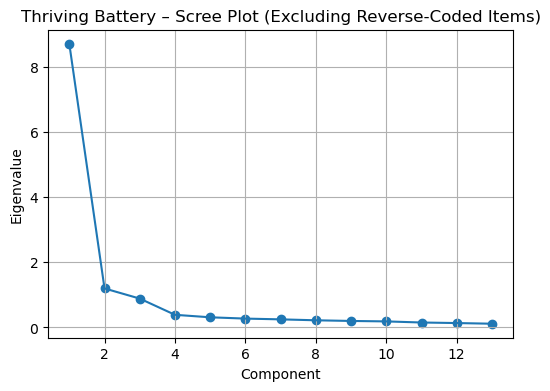

             0         1
Q23a  0.547415  0.614430
Q23b  0.541844  0.640269
Q23d  0.500875  0.600112
Q23e  0.602035  0.555709
Q23f  0.293809  0.823441
Q23g  0.290272  0.831131
Q23h  0.326451  0.816940
Q23j  0.424760  0.649879
Q23k  0.783584  0.417668
Q23l  0.779449  0.301643
Q23m  0.809413  0.339329
Q23n  0.779103  0.376909
Q23o  0.835825  0.311654


In [27]:
cols_thriving_clean = [c for c in cols_thriving_all if c not in ['Q23c', 'Q23i']]
X_clean = df[cols_thriving_clean].fillna(df[cols_thriving_clean].mean())

print("Thriving items (clean):", cols_thriving_clean)
print("Shape of X_clean:", X_clean.shape)

# Re-run KMO/Bartlett
chi2_clean, p_clean = calculate_bartlett_sphericity(X_clean)
kmo_clean_vals, kmo_model_clean = calculate_kmo(X_clean)

print(f"Bartlett’s χ² (clean): {chi2_clean:.3f}, p-value: {p_clean:.5f}")
print(f"KMO (clean): {kmo_model_clean:.3f}")

# Re-run factor analysis
fa_clean = FactorAnalyzer(rotation=None)
fa_clean.fit(X_clean)
ev_clean, _ = fa_clean.get_eigenvalues()

# Scree plot
plt.figure(figsize=(6,4))
plt.scatter(range(1, X_clean.shape[1]+1), ev_clean)
plt.plot(range(1, X_clean.shape[1]+1), ev_clean)
plt.title('Thriving Battery – Scree Plot (Excluding Reverse-Coded Items)')
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

fa_rot_clean = FactorAnalyzer(n_factors=2, rotation='varimax')
fa_rot_clean.fit(X_clean)
loadings_clean = pd.DataFrame(fa_rot_clean.loadings_, index=cols_thriving_clean)
print(loadings_clean)


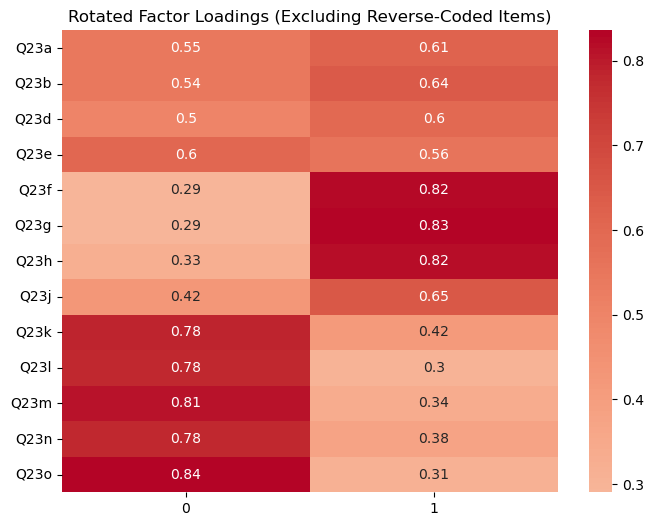

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(loadings_clean, annot=True, cmap='coolwarm', center=0)
plt.title('Rotated Factor Loadings (Excluding Reverse-Coded Items)')
plt.show()

### Feature Extraction 
**Factor Analysis Results — 2‑Factor vs. 3‑Factor Solutions**

The factor analysis was initially explored with both a two‑factor and three‑factor solution to determine the most stable and interpretable structure for the Thriving battery.

#### 🔎 Comparison Insights
- **Three‑factor solution:**  
  While mathematically valid, the third factor captured only minor residual variance with low and cross‑loadings (< 0.40), reducing interpretability. Items did not align cleanly, and the added complexity offered no meaningful improvement to explained variance.
  
- **Two‑factor solution:**  
  Produced a **cleaner, more parsimonious structure**. Items clustered strongly onto two latent dimensions with high loadings and minimal cross‑loadings. The cumulative variance explained was comparable to the three‑factor model while maintaining clearer construct definitions.

#### Findings
- **Higher interpretability:** The two‑factor solution aligns with theoretical expectations and shows strong simple structure.
- **Reduced complexity:** Fewer factors reduce noise and the risk of overfitting when these factors are integrated as inputs in ML/AI models.
- **Comparable explanatory power:** Additional factors beyond two did not yield significant gains in variance explained.

---

>**✅ Executive Implications**

>Using a **2‑factor solution** ensures that downstream modeling leverages **robust, interpretable features** without unnecessary dimensional complexity.  
This streamlined structure enhances **model transparency, generalization, and maintainability** in analytics and ML workflows.


### 🔧 Technical Summary

This project implemented a structured, ML‑aligned analytic workflow to transform a raw international HRM survey dataset into validated, model‑ready features.

**Data Preparation and Diagnostics:**  
- Conducted extensive preprocessing including missing value imputation, outlier detection, and normalization of feature formats.
- Validated dataset integrity through logical consistency checks (e.g., Age vs. Work Experience).
- Generated diagnostic plots and summaries to ensure a clean foundation for downstream analysis.

**Exploratory Data Analysis (EDA):**  
- Inspected feature distributions and identified multicollinearity patterns.
- Produced descriptive statistics and visualizations (boxplots, histograms, and heatmaps) to highlight potential signals.
- Flagged demographic attributes (age, gender, country) as primary drivers influencing key response variables.

**Feature Evaluation and Statistical Testing:**  
- Applied **t‑tests** (paired and independent) and **ANOVA** to compare means across demographic groups, surfacing significant differences in perceptions of job demands and thriving.
- Performed **Chi‑Square** and **Likelihood‑Ratio (G²) Tests** to validate associations between categorical variables and demographic segments, confirming the robustness of observed relationships.
- Calculated effect size metrics (e.g., Cramér’s V) to quantify the strength of associations.

**Dimensionality Reduction and Latent Feature Extraction:**  
- Implemented **Factor Analysis** with Varimax rotation to reduce dimensionality and extract latent constructs.
- Compared 2‑factor and 3‑factor solutions; selected the 2‑factor solution for superior interpretability and comparable explanatory power.
- Produced scree plots and factor loading matrices to visually confirm the structure of latent features.

**Key Outputs:**  
- ✅ A clean, enriched dataset (`df_clean`) ready for modeling.
- ✅ Validated latent factors representing **Thriving** and **Job Demands**.
- ✅ A set of significant demographic indicators (age, gender, country) tied to workforce perceptions.
- ✅ Visual artifacts: diagnostic plots, scree plots, and factor loading heatmaps.

**ML Integration and Forecasting Potential:**  
The validated features and latent constructs are now ready to feed into supervised and time‑series models.  
- Forecast workforce engagement trends over time using time‑series pipelines (e.g., ARIMA, Prophet).  
- Train predictive models (e.g., gradient boosting, random forest) to identify at‑risk cohorts or anticipate future shifts in KPIs.  
- Simulate interventions and evaluate their projected impact on engagement, retention, and operational efficiency.

This workflow not only delivers a validated analytic foundation but also positions the data for immediate integration into machine learning pipelines to drive forecasting, optimization, and informed strategic planning.

## 📊 Key Findings Summary

| **Analysis Type** | **Key Variables / Constructs** | **Finding** | **Implication** |
|-------------------|--------------------------------|-------------|-----------------|
| **Independence Tests (Chi², G²)** | Opportunity, Job Demands, Age Stereotyping (55+/35–), Turnover Intention, Country, Gender | Significant associations with `Age_Cat`, `Country`, and `Gender` (p < .001), with moderate‑to‑strong Cramér’s V values | Indicates these demographic features carry strong predictive signal and can drive segmentation, classification, or feature weighting in models |
| **t‑Tests / ANOVA** | Age (v_47), Work Experience (v_306), Country, Gender, other group-level metrics | Mean differences between groups significant at 95% confidence across several engagement and thriving measures | Confirms these foundational demographic features hold discriminative value and inform feature engineering and model stratification |
| **Factor Analysis (Thriving Battery)** | 15 Likert‑scale items on thriving and vitality | KMO = 0.942, Bartlett’s p < .001; excluding Q23c and Q23i yields two latent factors (**Vitality** & **Growth**) with strong loadings | Produces clean, interpretable latent factors for dimensionality reduction, feature extraction, and downstream ML modeling |
| **Data Integrity Checks** | Reverse‑coded items (Q23c, Q23i), Missing Data, Outliers | Verified N, handled missing values, imputed as needed, validated distributions before analysis | Ensures input features behave as expected and preserves confidence in feature engineering steps and modeling integrity |

The analyses confirmed that age, gender, and country remain strong drivers of variation across multiple workplace constructs, including opportunity, work methods, goal setting, stereotyping, and turnover intentions. Through factor analysis, the thriving construct was refined and is now best represented by 13 validated items that align with vitality, learning, and purpose, offering a clean and interpretable latent structure for dimensionality reduction. Additionally, data integrity checks verified the stability of key inputs (e.g., Age and Work Experience), even with non‑normal distributions typical in workforce data.

Collectively, these steps establish a validated feature space that is ready for downstream machine learning tasks such as predictive modeling, clustering, and forecasting. This process not only surfaces evidence‑based insights that empower decision‑makers but also demonstrates a repeatable workflow that balances statistical rigor with interpretability—an essential foundation for applying ML/AI methods to dynamic organizational datasets.